In [1]:
import numpy as np
import cv2 as cv

WIDTH = 128   # has a great influence on the result

In [5]:
import matplotlib.pyplot as plt

In [6]:
# read
img = cv.imread('data/dog_and_cat.jpg',0)

In [9]:
img = cv.resize(img, (WIDTH,WIDTH*img.shape[0]//img.shape[1]))

c = cv.dft(np.float32(img), flags = cv.DFT_COMPLEX_OUTPUT)
mag = np.sqrt(c[:,:,0]**2 + c[:,:,1]**2)
spectralResidual = np.exp(np.log(mag) - cv.boxFilter(np.log(mag), -1, (3,3)))

c[:,:,0] = c[:,:,0] * spectralResidual / mag
c[:,:,1] = c[:,:,1] * spectralResidual / mag
c = cv.dft(c, flags = (cv.DFT_INVERSE | cv.DFT_SCALE))
mag = c[:,:,0]**2 + c[:,:,1]**2
cv.normalize(cv.GaussianBlur(mag,(9,9),3,3), mag, 0., 1., cv.NORM_MINMAX)

array([[0.0020445 , 0.00207424, 0.00228909, ..., 0.023985  , 0.02736494,
        0.02839448],
       [0.00275373, 0.00278318, 0.00294409, ..., 0.02370577, 0.02698347,
        0.02788085],
       [0.00321403, 0.00326333, 0.00335979, ..., 0.0215704 , 0.02455271,
        0.0253194 ],
       ...,
       [0.06975888, 0.06689721, 0.05920509, ..., 0.0487933 , 0.05542155,
        0.05825118],
       [0.06593394, 0.06299869, 0.05579342, ..., 0.0458944 , 0.05245027,
        0.05505452],
       [0.06410606, 0.06121577, 0.05426768, ..., 0.04378113, 0.04985696,
        0.05238101]], dtype=float32)

Text(0.5, 1.0, 'Saliency map')

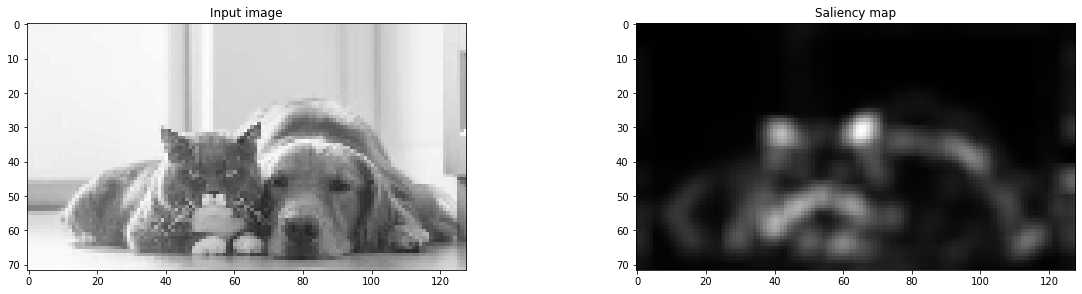

In [11]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input image')
#    cv2.imshow("input",  img)
plt.subplot(2,2,2), plt.imshow(mag, 'gray')
plt.title('Saliency map')